# Applying DCNN for Histology Images Classification Using Keras
---
Juan Pablo García Martínez  
Master in Bioestatisticts and Bioinformatics UOC-UB  
16-Dec-2018
***

# Index:
> 1. Loading Packages and DataBase
> 2. Applying the DCNN model
> 3. Results
> 4. Summary of the Proccess 

## 1. Loading Packages and DataBase

Firstly, we will import all the packages needed for this exercise.

In [10]:
import pickle
import os
from glob import glob
from matplotlib import pyplot as plt
%matplotlib inline
from PIL import Image
import numpy as np

By using the package *pickle* we will import the database previously created in the "Patching and Data Augmentation for Histology Images" notebook.

In [11]:
pickle_in = open("Train_Data.pickle", "rb")
Train_Data = pickle.load(pickle_in)
pickle_in = open("y_data.pickle", "rb")
y_data = pickle.load(pickle_in)

Confirm that the images are availabe (negative image).

(<matplotlib.image.AxesImage at 0x7f323caedc18>, 0)

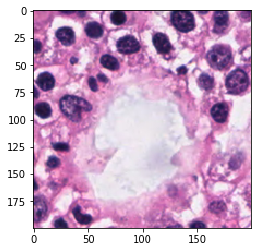

In [12]:
x11 = 1111
plt.imshow(Train_Data[x11]), y_data[x11]

Prepare data for the DNN method using the *train_test_split* function from the *sklearn.model_selection* package:

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(Train_Data, y_data, test_size=0.33, shuffle=True)

Confirm that the images are availabe (negative image).

(<matplotlib.image.AxesImage at 0x7f3238353d68>, 1)

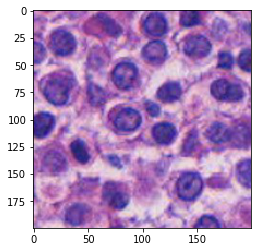

In [16]:
x22 = 112
plt.imshow(X_train[x22]), y_train[x22]

## 2. Applying the DCNN model

From this point we will use the API Keras with tensorflow backend as below:

In [17]:
import tensorflow as tf

In [18]:
from tensorflow import keras

In [19]:
#from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

By calling "Sequencial( )" we will start building all model. so for now own we will add the different layers needed.

In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(256, (3, 3), input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [22]:
model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

This converts our 3D feature maps to 1D feature vectors.

In [23]:
model.add(Flatten())

In [24]:
model.add(Dense(256))

In [25]:
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [26]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 3. Results

Finally we will train our method by applying an Adam optimizer.

In [34]:
training = model.fit(X_train, y_train, batch_size=21, epochs=5, validation_split=0.2)

Train on 711 samples, validate on 178 samples
Epoch 1/5
711/711 [==============================] - 6s 9ms/step - loss: 4.1706 - acc: 0.7384 - val_loss: 3.9408 - val_acc: 0.7528
Epoch 2/5
711/711 [==============================] - 6s 9ms/step - loss: 4.1706 - acc: 0.7384 - val_loss: 3.9408 - val_acc: 0.7528
Epoch 3/5
711/711 [==============================] - 6s 9ms/step - loss: 4.1706 - acc: 0.7384 - val_loss: 3.9408 - val_acc: 0.7528
Epoch 4/5
711/711 [==============================] - 6s 9ms/step - loss: 4.1706 - acc: 0.7384 - val_loss: 3.9408 - val_acc: 0.7528
Epoch 5/5
711/711 [==============================] - 6s 9ms/step - loss: 4.1706 - acc: 0.7384 - val_loss: 3.9408 - val_acc: 0.7528


## 4. Summary of the Proccess

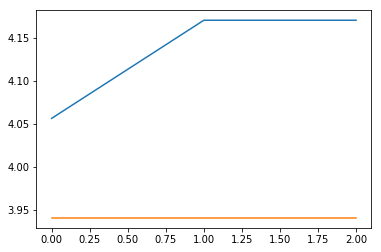

In [28]:
history = training.history
# Plot the training loss 
plt.plot(history['loss'])
# Plot the validation loss
plt.plot(history['val_loss'])

# Show the figure
plt.show()

In [31]:
model.evaluate(X_test, y_test, batch_size=10)

439/439 [==============================] - 1s 3ms/step


[4.1399360979336555, 0.7403189064701489]

In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 198, 198, 256)     7168      
_________________________________________________________________
activation_2 (Activation)    (None, 198, 198, 256)     0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 99, 99, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 97, 97, 256)       590080    
_________________________________________________________________
activation_3 (Activation)    (None, 97, 97, 256)       0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 48, 48, 256)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 589824)            0         
__________